<a href="https://colab.research.google.com/github/rasik-nep/Handwritten-Digit-Recognition-Web-App/blob/main/mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

# Load dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

# Dataset Visualization

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Combine train and test datasets (optional, you could also just use train or test)
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Flatten the images and normalize pixel values to range [0, 1]
X = images.reshape(images.shape[0], -1) / 255.0
y = labels

X.shape

(70000, 784)

In [ ]:
# Limit to 8000 samples for X and y
sample_size = 8000
X = images[:sample_size].reshape(sample_size, -1) / 255.0  # Flatten and normalize
y = labels[:sample_size]

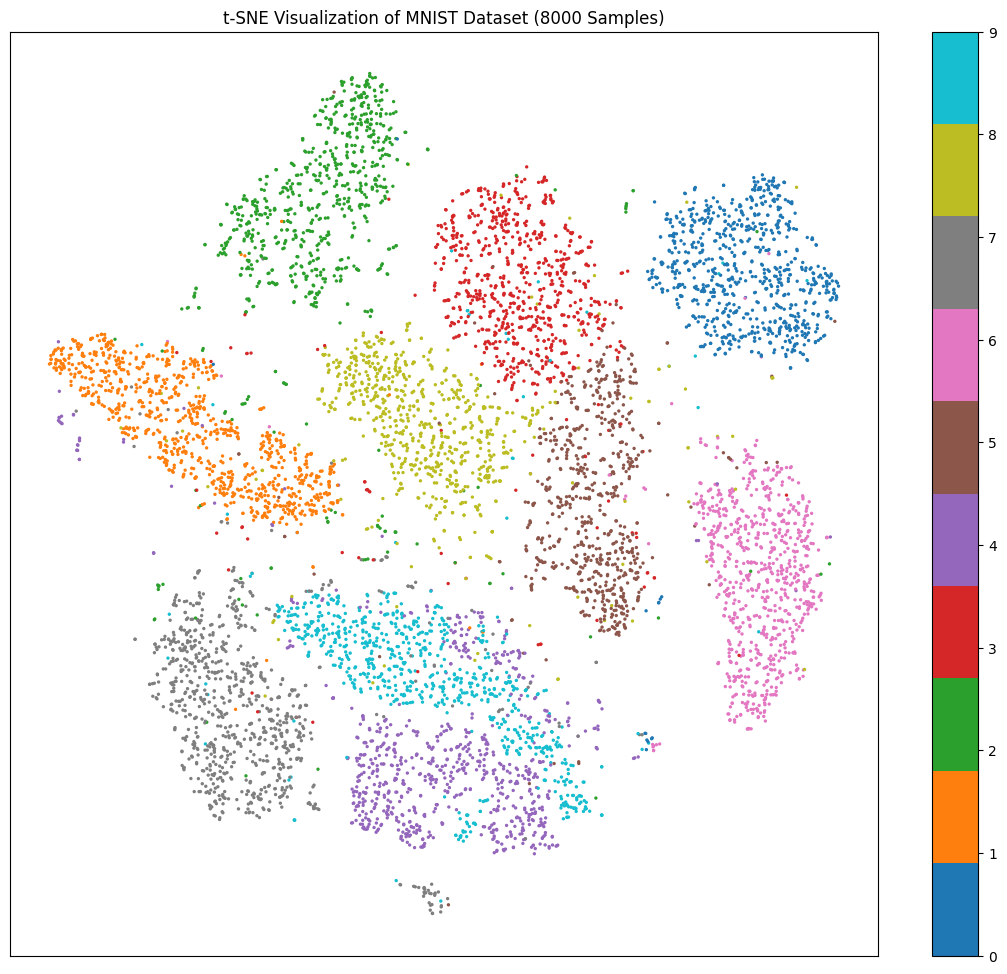

In [ ]:
# Running t-SNE on the limited data
tsne = TSNE(n_components=2, random_state=42)  # Set random_state for reproducibility
X_tsn = tsne.fit_transform(X)

# Plotting the t-SNE results
plt.figure(figsize=(14, 12))
scatter = plt.scatter(X_tsn[:, 0], X_tsn[:, 1], c=y, cmap='tab10', s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar(scatter)
plt.title("t-SNE Visualization of MNIST Dataset (8000 Samples)")
plt.show()

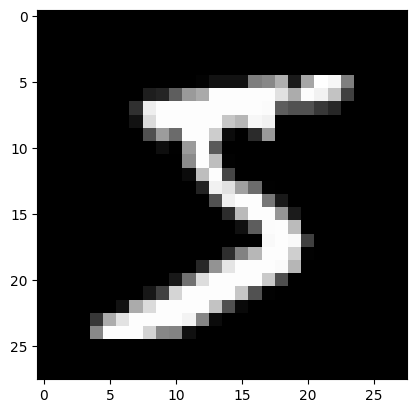

In [ ]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

5

# MLP

## Define model

Input shape-> (28*28,1)= (784,1)

1st hidden layer -> No of neurons = 512 , activation fxn = relu

Output layer -> No of neurons = 10 , activation fxn = softmax

In [ ]:
from keras import models
from keras import layers
model_mlp = models.Sequential()
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model_mlp.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Data Preprocessing

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images_mlp = train_images.reshape(60000, 28*28)
train_images_mlp.shape

(60000, 784)

In [ ]:
type(train_images_mlp[0][350])

numpy.uint8

In [ ]:
# change the int to float to get continuos values as we move thro's model's layers
train_images_mlp = train_images_mlp.astype('float32') / 255
type(train_images_mlp[0][350])

numpy.float32

In [ ]:
test_images_mlp = test_images.reshape(10000,28*28)
test_images_mlp = test_images_mlp.astype('float32') / 255

In [ ]:
test_images_mlp.shape

(10000, 784)

In [ ]:
train_images_mlp[0][350]

0.27450982

Say label = 5. We will change it to a 10bit value as 0000010000 (note as the index starts at 0, 6th element corresponds to digit 5 and hence is 1 and rest are zero)

In [ ]:
train_labels[0]

5

In [ ]:
from keras.utils import to_categorical
train_labels_mlp = to_categorical(train_labels)

In [ ]:
train_labels_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
test_labels_mlp = to_categorical(test_labels)

## Train the Model



*   We will use a batch size = 120
*   1 epoch = 60000 / 120 = 500 batches
*   1 epoch = 1 complete run of all train samples for training the model
*   We will go for a total of 5 epochs = 5 complete run of the all train samples



In [ ]:
history = model_mlp.fit(train_images_mlp, train_labels_mlp, epochs = 10, batch_size = 120, validation_split=0.3)

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8597 - loss: 0.4943 - val_accuracy: 0.9508 - val_loss: 0.1690
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9611 - loss: 0.1369 - val_accuracy: 0.9641 - val_loss: 0.1192
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9742 - loss: 0.0859 - val_accuracy: 0.9711 - val_loss: 0.0981
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9827 - loss: 0.0591 - val_accuracy: 0.9730 - val_loss: 0.0935
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9878 - loss: 0.0428 - val_accuracy: 0.9751 - val_loss: 0.0874
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9912 - loss: 0.0317 - val_accuracy: 0.9757 - val_loss: 0.0842
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9947 - loss: 0.0214 - val_accuracy: 0.9769 - val_loss: 0.0801
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9951 - loss: 0.0179 - val_accu

## Test the Model

In [ ]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_mlp, test_labels_mlp)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0834


In [ ]:
print('test accuracy:', (test_acc_mlp*100))

test accuracy: 98.01999926567078


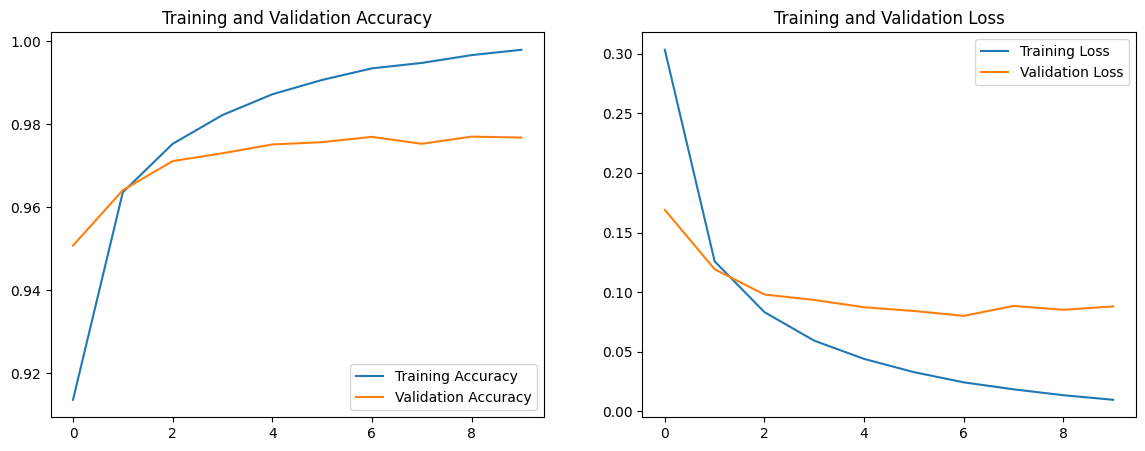

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

# CNN

## Define model

In [ ]:
from keras import models
from keras import layers
model_cnn = models.Sequential()

2 dimensional Convolution Layer

Number of filters/kernels = 32

Filter/Kernel Size = 3x3

Activation Function = relu

Input Shape = 28x28 matrix with 1 channel


In [ ]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Downsample the output from previous layer

We will take the max value for a every 2x2 window ... moved over the input

In [ ]:
model_cnn.add(layers.MaxPooling2D(2,2))

2 dimensional Convolution Layer

Number of filters/kernels = 64

Filter/Kernel Size = 3x3

Activation Function = relu (for non-linearity detection)

In [ ]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Downsample the output from previous layer

We will take the max value for a every 2x2 window ... moved over the input

In [ ]:
model_cnn.add(layers.MaxPooling2D(2,2))

2 dimensional Convolution Layer

Number of filters/kernels = 64

Filter/Kernel Size = 3x3

Activation Function = relu (for non-linearity detection)

In [ ]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
# convert it to vector form to feed to a fully connected network
model_cnn.add(layers.Flatten())

In [ ]:
# design for 64 outputs with activation function as relu (to learn non-linearity)
model_cnn.add(layers.Dense(64, activation = 'relu'))

In [ ]:
# outputs will be 10 corresponding to the 10 digits (0 to 9).
# Activation Function chosen here is softmax to have a probabilistic output.
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,770 (428.79 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 0 (0.00 B)

## Data Preprocessing

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# CNN needs another dimension for the channel
train_images_cnn = train_images.reshape(60000, 28, 28, 1)

In [ ]:
train_images_cnn.shape

(60000, 28, 28, 1)

change the element values from integer to decimal to have continuos values during prediction through the various layers.

limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed

In [ ]:
train_images_cnn = train_images_cnn.astype('float32') / 255
test_images_cnn = test_images.reshape(10000, 28, 28, 1)
test_images_cnn = test_images_cnn.astype('float32') / 255

convert the labels to 10bit values

In [ ]:
from keras.utils import to_categorical
train_labels_cnn = to_categorical(train_labels)
test_labels_cnn = to_categorical(test_labels)

## Train the Model

In [ ]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will use a batch size = 60.

1 epoch = 60000 / 60 = 1000 batches

1 epoch = 1 complete run of all train samples for training the model

We will go for a total of 5 epochs = 5 complete run of the all train samples

In [ ]:
history_cnn = model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5,validation_split=0.3, batch_size = 60)

Epoch 1/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 64s 89ms/step - accuracy: 0.8360 - loss: 0.4976 - val_accuracy: 0.9761 - val_loss: 0.0794
Epoch 2/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9868 - val_loss: 0.0492
Epoch 3/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9884 - val_loss: 0.0395
Epoch 4/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9864 - val_loss: 0.0459
Epoch 5/5
700/700 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9906 - val_loss: 0.0337


## Test the Model

In [ ]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9905 - loss: 0.0317


In [ ]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.26999807357788


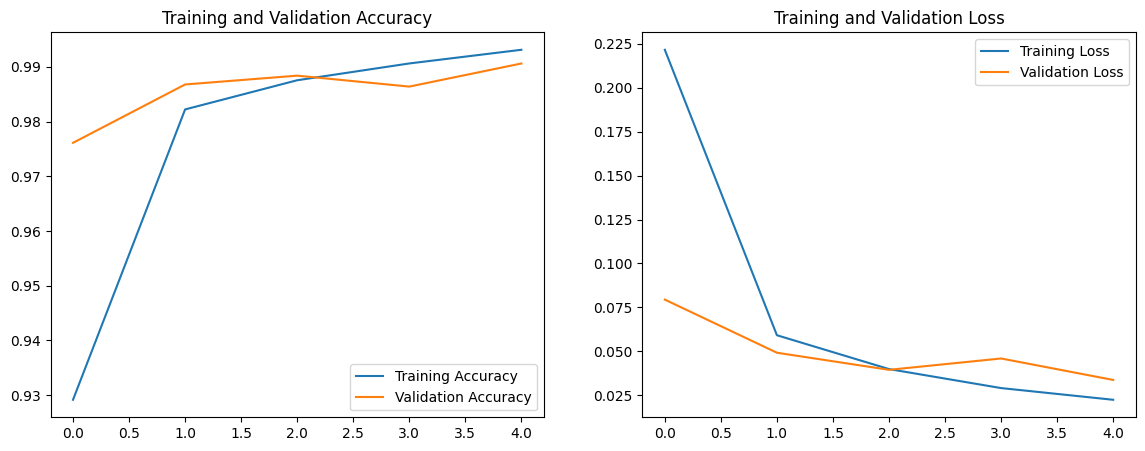

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

# Export model

In [ ]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save the entire model (architecture + weights) in a single HDF5 file
model_cnn.save('model_cnn_complete.h5')

In [ ]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_layers_model model_cnn_complete.h5 model_js

2024-09-02 07:53:53.051362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 07:53:53.075349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 07:53:53.082456: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 07:53:54.456393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
from google.colab import files
import shutil

# Compress the output directory into a zip file for easy download
shutil.make_archive('model_js', 'zip', 'model_js')

# Download the zip file to your local machine
files.download('model_js.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>